# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [60]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code 
from inauguralproject import ExchangeEconomyClass
from inauguralproject import ExchangeEconomyClass2
import matplotlib.pyplot as plt
from scipy.optimize import minimize

maincolor = 'purple'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In order to find the pairs of combinations of $x_1^A$ and $x_2^A$ that are pareto-optimal relative to the initial allocation of goods, we utilize our contructed functions from ExchangeEconomyClass in order to go through and compare utilities gained in at the initial state with other possible combinations.



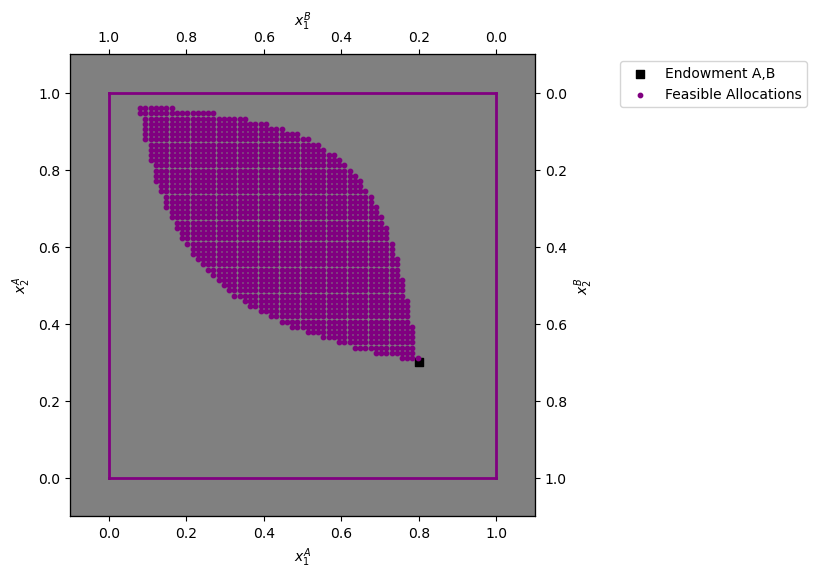

In [15]:

# Create an instance of the ExchangeEconomyClass
economy = ExchangeEconomyClass()

# Calculate utilities at initial endowments
par = economy.par
initial_utility_A = economy.utility_A(par.w1A, par.w2A)
initial_utility_B = economy.utility_B(1 - par.w1A, 1 - par.w2A)

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# Define the number of points in the grid for each good (as specified, N=75)
N = 75
x1A_values = np.linspace(0, w1bar, N)
x2A_values = np.linspace(0, w2bar, N)

# Prepare to store feasible allocations
feasible_x1A = []
feasible_x2A = []

# Check each allocation in the grid
for x1A in x1A_values:
    for x2A in x2A_values:
        # Calculate the utility for both consumers at this allocation
        utility_A = economy.utility_A(x1A, x2A)
        utility_B = economy.utility_B(w1bar - x1A, w2bar - x2A)

        # Check if both utilities are at least as high as with initial endowments
        if utility_A >= initial_utility_A and utility_B >= initial_utility_B:
            feasible_x1A.append(x1A)
            feasible_x2A.append(x2A)

# Set up the figure and axes as provided in your code
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)

ax_A = fig.add_subplot(1, 1, 1)
ax_A.set_facecolor('grey')
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Scatter plot for A's endowment point
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='Endowment A,B')
#ax_B.scatter(1-par.w1A, 1-par.w2A, marker='s', color='brown', label='Endowment B')  # Endowment B is the mirror of A's

# Plot the feasible allocations
ax_A.scatter(feasible_x1A, feasible_x2A, color=maincolor, s=10, label='Feasible Allocations')

# Draw the box representing the limits of the total endowment
ax_A.plot([0, w1bar], [0, 0], lw=2, color=maincolor)
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color=maincolor)
ax_A.plot([0, 0], [0, w2bar], lw=2, color=maincolor)
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color=maincolor)

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

# Show the plot
plt.show()


It is evident from the figure that the feasible allocation which are Pareto-optimal relative to the initial endowment is given by the purple "cigar" which lies north-west of the initial endowment which is marked with the black dot. 

# Question 2

In order to find the errors compared to the market clearing state for each price in the interval from (0.5;2.5), we make a for-loop for this range and for each price calculate these errors, store these errors in a list, which we then plot.

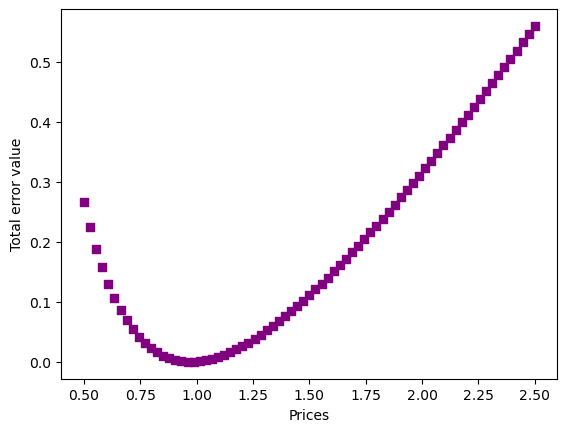

In [16]:
p_values = np.linspace(0.5, 2.5, N)
ErrorList = []

for price in p_values:
   error1, error2 = economy.check_market_clearing(price)
   total_error = error1+error2
   ErrorList.append(total_error)

plt.scatter(p_values, ErrorList, marker='s', color=maincolor)
plt.xlabel('Prices')
plt.ylabel('Total error value')
plt.show()


As evident from the figure, we notice a convex relationship between the erros and prices. Seemingly the errors are minimized around the range of (0.9;1)

# Question 3

In order to find the market-clearing price we simply look for the lowest value in our stored range of errors from the previous question. We then find the index in the list of this value and use it to attain the price that matches this error.

In [52]:
min_error = min(ErrorList)
min_error_index = ErrorList.index(min_error)
optimal_price = p_values[min_error_index]
print(f'The optimal price is: {optimal_price}')
print(f'The allocation for A is: ({economy.demand_A(optimal_price)[0]}, {economy.demand_A(optimal_price)[1]})')
print(f'The allocation for B is: ({1-economy.demand_A(optimal_price)[0]}, {1-economy.demand_A(optimal_price)[1]})')
print(f'A gets the utility: {economy.utility_A(economy.demand_A(optimal_price)[0], economy.demand_A(optimal_price)[1])}')
print(f'B gets the utility: {economy.utility_B(1-economy.demand_A(optimal_price)[0], 1-economy.demand_A(optimal_price)[0])}')
print(f'Total utility is: {economy.utility_A(economy.demand_A(optimal_price)[0], economy.demand_A(optimal_price)[1])+economy.utility_B(1-economy.demand_A(optimal_price)[0], 1-economy.demand_A(optimal_price)[1])}')

The optimal price is: 0.9594594594594594
The allocation for A is: (0.37089201877934275, 0.7117117117117118)
The allocation for B is: (0.6291079812206573, 0.28828828828828823)
A gets the utility: 0.5727326005035266
B gets the utility: 0.6291079812206573
Total utility is: 1.057752022572599


We see that the market clearing price is $\approx$ 0.955

# Question 4a

In order find the optimizing allocation for A if she were to choose the price, we make a for loop that calculates the utilities for each price in the range (0.5;2.5) and their corresponding allocations and afterwards find the allocation that matches the highest possible utility from this list.

In [47]:
p_values = np.linspace(0.5, 2.5, N)
utility_list_A = []

for price in p_values:
    x1B, x2B = economy.demand_B(price)
    x1A, x2A = 1-x1B, 1-x2B
    utilityA = economy.utility_A(x1A,x2A)
    utility_list_A.append(utilityA)



#Load the lists into numpy arrays
p_values_array = np.array(p_values)
utility_list_A_array = np.array(utility_list_A)


# Create a Bolean mask for elements that are not 'na' (numpy.nan)
feasible_utilities = ~np.isnan(utility_list_A_array)

# Apply the mask for our numpy arrays

filtered_utilities = utility_list_A_array[feasible_utilities]
filtered_p_values = p_values_array[feasible_utilities]

# Here we find the maximizing utility
max_utility_index = np.argmax(filtered_utilities)


optimal_price = filtered_p_values[max_utility_index]

Allocation_x1B, Allocation_x2B = economy.demand_B(optimal_price)
Allocation_x1A, Allocation_x2A = 1-Allocation_x1B, 1-Allocation_x2B

print(f'The chosen price will be: {optimal_price}')
print(f'The allocation for A is: ({Allocation_x1A}, {Allocation_x2A})')
print(f'The allocation for B is: ({Allocation_x1B}, {Allocation_x2B})')

#plt.scatter(p_values, utility_list_A, marker='s', color=maincolor)
#plt.xlabel('Prices')
#plt.ylabel('Utility for A')
#plt.show()


The chosen price will be: 1.9054054054054055
The allocation for A is: (0.6217494089834517, 0.6396396396396397)
The allocation for B is: (0.37825059101654834, 0.36036036036036034)


c:\Users\ander\OneDrive\Skrivebord\IntroProgOpgaver\projects-2024-anders-2-don-1\inauguralproject\inauguralproject.py:22: RuntimeWarning: invalid value encountered in scalar power
  return (x1A ** self.par.alpha) * (x2A ** (1 - self.par.alpha))


# Question 4b

Now, we utilize the minimize function to find the optimal price in the range (0,$\infty$)


In [49]:
# Assuming economy is an object with methods demand_B(price) and utility_A(x1A, x2A)
# Define a function that calculates the negative utility for A for a given price
def neg_utility_A(price):
    x1B, x2B = economy.demand_B(price[0])  # optimize.minimize passes price as an array
    x1A, x2A = 1 - x1B, 1 - x2B
    return -economy.utility_A(x1A, x2A)  # Minimize the negative utility

# Initial guess for the price
initial_price = [1.0]  # optimize.minimize requires the initial guess to be an array

# Bounds for the price, assuming positive values only
price_bounds = [(0, None)]  # This bounds the price to be positive

# Run the optimization
result = minimize(neg_utility_A, initial_price, bounds=price_bounds)

# Extract the optimal price
optimal_price = result.x[0]

# Calculate allocations based on the optimal price
Allocation_x1B, Allocation_x2B = economy.demand_B(optimal_price)
Allocation_x1A, Allocation_x2A = 1 - Allocation_x1B, 1 - Allocation_x2B

print(f'The chosen price will be: {optimal_price}')
print(f'The allocation for A is: ({Allocation_x1A}, {Allocation_x2A})')
print(f'The allocation for B is: ({Allocation_x1B}, {Allocation_x2B})')
print(f'A gets the utility: {economy.utility_A(Allocation_x1A, Allocation_x2A)}')
print(f'B gets the utility: {economy.utility_B(1-Allocation_x1A, 1-Allocation_x2A)}')
print(f'Total utility is: {economy.utility_A(Allocation_x1A, Allocation_x2A)+economy.utility_B(1-Allocation_x1A, 1-Allocation_x2A)}')


The chosen price will be: 1.8992869848844791
The allocation for A is: (0.6209604251241065, 0.6400475343410348)
The allocation for B is: (0.3790395748758934, 0.35995246565896527)
A gets the utility: 0.6336208505880266
B gets the utility: 0.37256731771295687
Total utility is: 1.0061881683009835


# Question 5.a

In [29]:
feasible_allocations = list(zip(feasible_x1A, feasible_x2A))
feasible_utilities_A = []

for x1A, x2A in feasible_allocations:
    feasible_utility_A = economy.utility_A(x1A,x2A)
    feasible_utilities_A.append(feasible_utility_A)

Optimal_utility = max(feasible_utilities_A)
Optimal_utility_index = feasible_utilities_A.index(Optimal_utility)

Optimal_allocation = feasible_allocations[Optimal_utility_index]

print(f'The allocation for A is: ({Optimal_allocation[0]}, {Optimal_allocation[1]})')


The allocation for A is: (0.5810810810810811, 0.8378378378378379)


# Question 5.b

In [50]:
# Objective function: Negative of A's utility to turn the maximization problem into a minimization problem
def objective(x):
    x1A, x2A = x
    return -economy.utility_A(x1A, x2A)

# Constraint for B's utility to be at least as high as the initial utility
def constraint(x):
    x1A, x2A = x
    w1B, w2B = w1bar - x1A, w2bar - x2A
    return economy.utility_B(w1B, w2B) - initial_utility_B

# Initial guess for the allocation
x0 = [par.w1A, par.w2A]

# Bounds for the allocations
bounds = [(0, w1bar), (0, w2bar)]

# Constraint dictionary
cons = {'type': 'ineq', 'fun': constraint}

# Solve the optimization problem
result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)

if result.success:
    optimal_x1A, optimal_x2A = result.x
    print(f"The optimal allocation for A is: ({optimal_x1A}, {optimal_x2A})")
    print(f"The optimal allocation for B is: ({1-optimal_x1A}, {1-optimal_x2A})")
    print(f'A gets the utility: {economy.utility_A(optimal_x1A, optimal_x2A)}')
    print(f'B gets the utility: {economy.utility_B(1-optimal_x1A, 1-optimal_x2A)}')
    print(f'Total utility is: {economy.utility_A(optimal_x1A, optimal_x2A)+economy.utility_B(1-optimal_x1A, 1-optimal_x2A)}')

The optimal allocation for A is: (0.5757450571871308, 0.8444377880991675)
The optimal allocation for B is: (0.42425494281286924, 0.15556221190083253)
A gets the utility: 0.7432276287140577
B gets the utility: 0.3036588738576721
Total utility is: 1.0468865025717298


# Question 6.a

In [51]:
# Objective function: Negative of A's utility to turn the maximization problem into a minimization problem
def objective(x):
    x1A, x2A = x
    return -(economy.utility_A(x1A, x2A)+economy.utility_B(1-x1A, 1-x2A))


# Initial guess for the allocation
x0 = [par.w1A, par.w2A]

# Bounds for the allocations
bounds = [(0, w1bar), (0, w2bar)]

# Solve the optimization problem
result = minimize(objective, x0, method='SLSQP', bounds=bounds)

if result.success:
    optimal_x1A, optimal_x2A = result.x
    print(f"The optimal allocation for A is: ({optimal_x1A}, {optimal_x2A})")
    print(f"The optimal allocation for B is: ({1-optimal_x1A}, {1-optimal_x2A})")
    print(f'A gets the utility: {economy.utility_A(optimal_x1A, optimal_x2A)}')
    print(f'B gets the utility: {economy.utility_B(1-optimal_x1A, 1-optimal_x2A)}')
    print(f'Total utility is: {economy.utility_A(optimal_x1A, optimal_x2A)+economy.utility_B(1-optimal_x1A, 1-optimal_x2A)}')
    


The optimal allocation for A is: (0.3334399256734374, 0.6668016053890844)
The optimal allocation for B is: (0.6665600743265626, 0.3331983946109156)
A gets the utility: 0.5292614854006306
B gets the utility: 0.5290058782405017
Total utility is: 1.0582673636411322


# Question 6.b

# Question 7

In [80]:
import random

# Create a list of 50 tuples, each with two random numbers between 0 and 1
random_initial_allocations = [(random.uniform(0, 1), random.uniform(0, 1)) for _ in range(50)]



# Question 8

[(0.42600562511668544, 0.7906065331755371), (0.15588685712308473, 0.3646291017394659), (0.16302184628517394, 0.3848525500095509), (0.3488919479870829, 0.6883801676885773), (0.4391306914477657, 0.8098187477831656), (0.39318767264050114, 0.7512034792518333), (0.6664679288063929, 0.9999622322442805), (0.2588425693508849, 0.5562081929684454), (0.32685646753290654, 0.657160249371825), (0.3166815040165526, 0.642888193896104), (0.5403629966951584, 0.9061634159423116), (0.7260032259335897, 0.999956005719469), (0.1809980287267339, 0.41336131834017636), (0.545082243935228, 0.9304724242175582), (0.2458651074420262, 0.5322595411889495), (0.19618333709084287, 0.44164241080255034), (0.71504855579759, 0.9999507147481934), (0.38837236739111286, 0.7411692190973767), (0.21346216582014796, 0.47420286602311834), (0.1734896769063802, 0.4038039999401046), (0.4252934381877094, 0.787955772392308), (0.28611067240763405, 0.5960825278461399), (0.37260674868401245, 0.7227260978869009), (0.1971963233088841, 0.4495

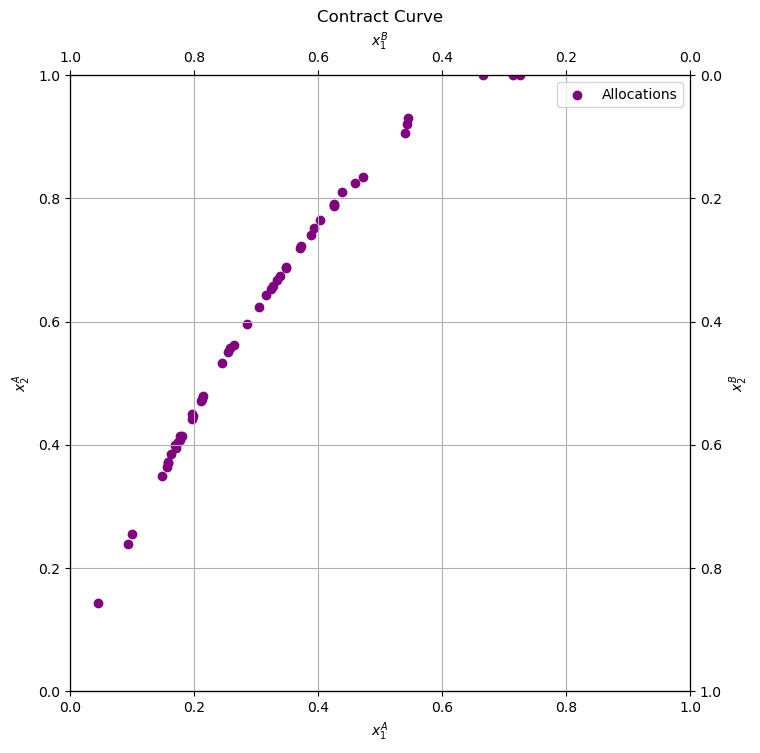

In [101]:
economy2 = ExchangeEconomyClass2()
Allocations = []

for w1A, w2A in random_initial_allocations:
    
    def total_market_error(price):
        error1, error2 = economy2.check_market_clearing(price, w1A, w2A)
        return error1 + error2

    initial_guess = 0.5
    price_bounds = [(0, None)]
    result = minimize(total_market_error, initial_guess,  method='Nelder-Mead', bounds=price_bounds)
    market_clearing_price = result.x[0]
    Allocations.append(economy2.demand_A(market_clearing_price, w1A, w2A))

print(Allocations)


import matplotlib.pyplot as plt

# Assuming Allocations is your list of tuples with (x1A, x2A)
x1A, x2A = zip(*Allocations)  # Unpacks the list of tuples into two lists



# Create the plot
plt.figure(figsize=(8, 8))  # Making the plot larger to clearly see all points
plt.scatter(x1A, x2A, color=maincolor, label='Allocations')  # Plotting the allocations
plt.title('Contract Curve')
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')

# Setting the primary axes limits
plt.xlim(0, 1)  # Setting the x-axis limits
plt.ylim(0, 1)  # Setting the y-axis limits

# Adding a grid for better visibility
plt.grid(True)

# Adding a legend
plt.legend()

# Adding secondary axes for Consumer B
ax2 = plt.gca().twinx()  # Creates a secondary y-axis
ax2.set_ylabel('$x_2^B$')
ax2.set_ylim(0, 1)  # Setting the secondary y-axis limits to mirror primary y-axis

ax3 = plt.gca().twiny()  # Creates a secondary x-axis
ax3.set_xlabel('$x_1^B$')
ax3.set_xlim(0, 1)  # Setting the secondary x-axis limits to mirror primary x-axis

# Invert the secondary axes to show allocations to B as the remainder
ax2.invert_yaxis()
ax3.invert_xaxis()

plt.show()




ADD CONCISE CONLUSION.

In [99]:
w1A = 1
w2A = 1



def total_market_error(price):
    error1, error2 = economy2.check_market_clearing(price, w1A, w2A)
    print(error1)
    return error1 + error2

initial_guess = 0.5
price_bounds = [(0, None)]
result = minimize(total_market_error, initial_guess, bounds=price_bounds)
market_clearing_price = result.x[0]
economy2.demand_A(market_clearing_price, w1A, w2A)


[0.]
[1.59999999e-07]
[nan]
[3.99999992e+08]


c:\Users\ander\OneDrive\Skrivebord\IntroProgOpgaver\projects-2024-anders-2-don-1\inauguralproject\inauguralproject.py:82: RuntimeWarning: divide by zero encountered in divide
  budget = w1A * p1 + w2A
c:\Users\ander\OneDrive\Skrivebord\IntroProgOpgaver\projects-2024-anders-2-don-1\inauguralproject\inauguralproject.py:90: RuntimeWarning: divide by zero encountered in divide
  budget = w1B * p1 + w2B
c:\Users\ander\OneDrive\Skrivebord\IntroProgOpgaver\projects-2024-anders-2-don-1\inauguralproject\inauguralproject.py:90: RuntimeWarning: invalid value encountered in multiply
  budget = w1B * p1 + w2B


(1.0, 1.0)